<a href="https://colab.research.google.com/github/iam-rushi47/pw-study/blob/pw-study/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ##Thereotical solution

---

## **1. What is a Decision Tree, and how does it work**

- A **Decision Tree** is a supervised machine learning algorithm used for **classification and regression**.
- It makes decisions based on feature values, forming a tree structure of **decision nodes** and **leaf nodes**.
- The tree splits data using conditions on features, recursively, until a stopping condition is met.

---

## **2. What are impurity measures in Decision Trees**

- Impurity measures evaluate how "pure" or "mixed" a node is.
- Common impurity measures:
  - **Gini Impurity**
  - **Entropy**
  - **Classification Error**
- A pure node contains data points from only one class.

---

## **3. What is the mathematical formula for Gini Impurity**

\[
Gini = 1 - \sum_{i=1}^{n} p_i^2
\]

- Where \( p_i \) is the probability of class \( i \) in a node.

---

## **4. What is the mathematical formula for Entropy**

\[
Entropy = - \sum_{i=1}^{n} p_i \cdot \log_2(p_i)
\]

- Where \( p_i \) is the probability of class \( i \) in a node.

---

## **5. What is Information Gain, and how is it used in Decision Trees**

- **Information Gain** measures the **reduction in impurity** after a split.
- It is calculated as:
\[
IG = Impurity(parent) - \sum_{k} \frac{N_k}{N} \cdot Impurity(k)
\]
- Used to choose the best feature to split at each step.

---

## **6. What is the difference between Gini Impurity and Entropy**

| Gini Impurity | Entropy |
|---------------|---------|
| Faster to compute | More theoretical background (Information Theory) |
| Tends to isolate the most frequent class | Takes all class probabilities into account |
| Often gives similar results to Entropy | Used when probabilistic interpretation is needed |

---

## **7. What is the mathematical explanation behind Decision Trees**

- Based on **recursive binary partitioning**.
- Uses impurity measures (Gini, Entropy) to find the best split.
- Splitting continues until stopping criteria:
  - Maximum depth
  - Minimum samples per leaf
  - No further impurity reduction

---

## **8. What is Pre-Pruning in Decision Trees**

- Stops the tree from growing too deep **during training**.
- Methods include:
  - Limiting tree depth
  - Setting minimum samples per leaf/split
  - Setting max number of leaf nodes

---

## **9. What is Post-Pruning in Decision Trees**

- Allows the tree to grow fully, then **trims unnecessary branches**.
- Uses validation data to determine which branches to prune.
- Improves generalization and reduces overfitting.

---

## **10. What is the difference between Pre-Pruning and Post-Pruning**

| Pre-Pruning | Post-Pruning |
|-------------|--------------|
| Stops tree growth early | Trims a fully grown tree |
| Risk of underfitting | Risk of overfitting before pruning |
| Based on criteria like depth/samples | Based on validation performance |

---

## **11. What is a Decision Tree Regressor**

- A variant of decision trees for **regression tasks**.
- Predicts a **continuous value** instead of a class label.
- Splits are made to minimize **mean squared error (MSE)** or other regression metrics.

---

## **12. What are the advantages and disadvantages of Decision Trees**

**Advantages:**
- Easy to understand and interpret
- No need for feature scaling
- Works on both numerical and categorical data

**Disadvantages:**
- Prone to overfitting
- Unstable to small changes in data
- Greedy splitting may not yield global optimum

---

## **13. How does a Decision Tree handle missing values**

- Can:
  - Use surrogate splits
  - Impute missing values
  - Skip features with missing data during split

- Some libraries (e.g., XGBoost, LightGBM) handle missing values natively.

---

## **14. How does a Decision Tree handle categorical features**

- Categorical features can be:
  - **Label encoded** or **one-hot encoded** before training
  - Some implementations (like `DecisionTreeClassifier` in `sklearn`) require numeric input
  - Others (like CatBoost) handle categorical data directly

---

## **15. What are some real-world applications of Decision Trees**

- Medical Diagnosis (e.g., disease prediction)
- Credit Risk Analysis
- Customer Churn Prediction
- Fraud Detection
- Loan Approval Systems
- Marketing & Sales Forecasting

---


## Practical Solution

In [1]:
#  1. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Accuracy on Iris dataset:", clf.score(X_test, y_test))

Accuracy on Iris dataset: 1.0


In [18]:
#  2. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances*
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
print("Feature Importances (Gini):", clf.feature_importances_)




Feature Importances (Gini): [0.01787567 0.01787567 0.88187037 0.08237829]


In [19]:
#  3.  Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
print("Accuracy using Entropy:", clf.score(X_test, y_test))

Accuracy using Entropy: 0.9736842105263158


In [6]:
#  4. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_h, y_h = housing.data, housing.target
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train_h, y_train_h)
y_pred_h = reg.predict(X_test_h)
print("MSE on Housing Data:", mean_squared_error(y_test_h, y_pred_h))

MSE on Housing Data: 0.515915246101221


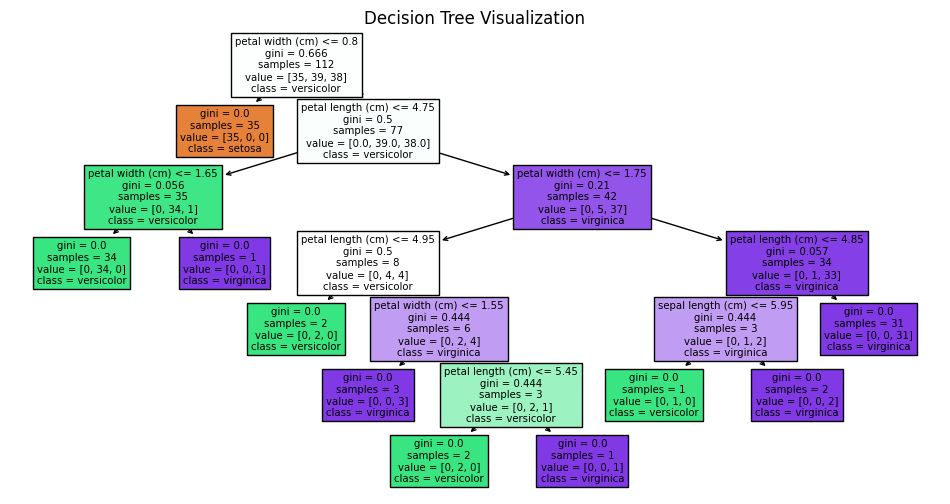

In [7]:
#  5. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz*


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [8]:
#  6.6 Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree*

clf_small = DecisionTreeClassifier(max_depth=3)
clf_small.fit(X_train, y_train)
clf_full = DecisionTreeClassifier()
clf_full.fit(X_train, y_train)
print("Accuracy (Depth=3):", clf_small.score(X_test, y_test))
print("Accuracy (Full Tree):", clf_full.score(X_test, y_test))

Accuracy (Depth=3): 1.0
Accuracy (Full Tree): 1.0


In [9]:
#  7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree*

clf_custom = DecisionTreeClassifier(min_samples_split=5)
clf_custom.fit(X_train, y_train)
clf_default = DecisionTreeClassifier()
clf_default.fit(X_train, y_train)
print("Accuracy (min_samples_split=5):", clf_custom.score(X_test, y_test))
print("Accuracy (default):", clf_default.score(X_test, y_test))

Accuracy (min_samples_split=5): 1.0
Accuracy (default): 1.0


In [10]:
#  8.8 Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data*

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, random_state=42)
clf_unscaled = DecisionTreeClassifier().fit(X_train, y_train)
clf_scaled = DecisionTreeClassifier().fit(X_train_s, y_train_s)
print("Accuracy (Unscaled):", clf_unscaled.score(X_test, y_test))
print("Accuracy (Scaled):", clf_scaled.score(X_test_s, y_test_s))

Accuracy (Unscaled): 1.0
Accuracy (Scaled): 1.0


In [11]:
#  9 Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification*

from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(DecisionTreeClassifier())
ovr.fit(X_train, y_train)
print("Accuracy using OvR Strategy:", ovr.score(X_test, y_test))

Accuracy using OvR Strategy: 1.0


In [12]:
#  10 Write a Python program to train a Decision Tree Classifier and display the feature importance scores*

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.01787567 0.         0.41581891 0.56630542]


In [13]:
# 11 Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree*

reg_restricted = DecisionTreeRegressor(max_depth=5).fit(X_train_h, y_train_h)
reg_unrestricted = DecisionTreeRegressor().fit(X_train_h, y_train_h)
print("MSE (max_depth=5):", mean_squared_error(y_test_h, reg_restricted.predict(X_test_h)))
print("MSE (Unrestricted):", mean_squared_error(y_test_h, reg_unrestricted.predict(X_test_h)))

MSE (max_depth=5): 0.526799989691142
MSE (Unrestricted): 0.5319033576633333


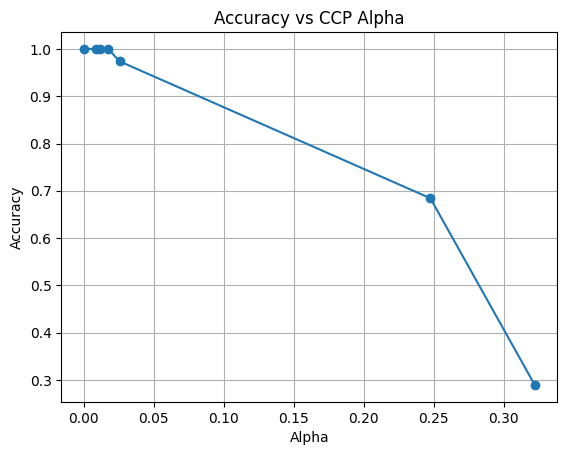

In [14]:
#  12 Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy*

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
acc_scores = [clf.score(X_test, y_test) for clf in clfs]
plt.plot(ccp_alphas, acc_scores, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.grid(True)
plt.show()

In [15]:
#  13 Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score*

from sklearn.metrics import classification_report

clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



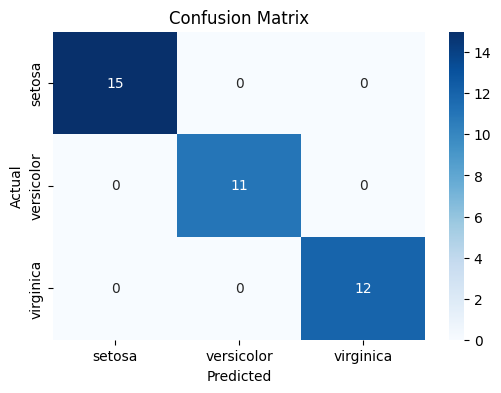

In [16]:
#  14 Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn*

import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
#  15 Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2, 3, 4, 5, None], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Best Accuracy: 0.9367588932806324
